In [575]:
## Importing essentials

In [576]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse
import re 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text


In [577]:
## CREATE THE EVENTS DATABASE AND THEN THE LIST WITH THE URLS
url_events = "https://api.fiteq.org/api/v2/fiteq/events"

In [578]:
r_events = requests.get(url_events)

In [579]:
soup_events = BeautifulSoup(r_events.content, 'html.parser')

In [580]:
data_events = json.loads(soup_events.text)

In [581]:
data_events

[{'calendarState': 'ARCHIVED',
  'id': 72,
  'name': 'Teqball World Championships 2017',
  'startDate': '2017-06-23T00:00:00',
  'endDate': '2017-06-24T00:00:00',
  'country': 'Hungary',
  'city': 'Budapest',
  'location2': None,
  'state': 'closed',
  'category': 'teqball',
  'userParticipating': False,
  'comingSoon': True,
  'hero': None,
  'googleMapsLink': None,
  'streetViewLink': None,
  'entryDeadline': None,
  'cancellationDeadline': None,
  'registrationCount': 11,
  'partnerRegistrationType': 0,
  'categories': [2, 5]},
 {'calendarState': 'ARCHIVED',
  'id': 73,
  'name': 'Teqball World Championships 2018',
  'startDate': '2018-10-12T00:00:00',
  'endDate': '2018-10-13T00:00:00',
  'country': 'France',
  'city': '',
  'location2': None,
  'state': 'closed',
  'category': 'teqball',
  'userParticipating': False,
  'comingSoon': True,
  'hero': None,
  'googleMapsLink': None,
  'streetViewLink': None,
  'entryDeadline': None,
  'cancellationDeadline': None,
  'registrationCoun

In [582]:
df_events = pd.DataFrame.from_dict(data_events)


In [583]:
data_events

[{'calendarState': 'ARCHIVED',
  'id': 72,
  'name': 'Teqball World Championships 2017',
  'startDate': '2017-06-23T00:00:00',
  'endDate': '2017-06-24T00:00:00',
  'country': 'Hungary',
  'city': 'Budapest',
  'location2': None,
  'state': 'closed',
  'category': 'teqball',
  'userParticipating': False,
  'comingSoon': True,
  'hero': None,
  'googleMapsLink': None,
  'streetViewLink': None,
  'entryDeadline': None,
  'cancellationDeadline': None,
  'registrationCount': 11,
  'partnerRegistrationType': 0,
  'categories': [2, 5]},
 {'calendarState': 'ARCHIVED',
  'id': 73,
  'name': 'Teqball World Championships 2018',
  'startDate': '2018-10-12T00:00:00',
  'endDate': '2018-10-13T00:00:00',
  'country': 'France',
  'city': '',
  'location2': None,
  'state': 'closed',
  'category': 'teqball',
  'userParticipating': False,
  'comingSoon': True,
  'hero': None,
  'googleMapsLink': None,
  'streetViewLink': None,
  'entryDeadline': None,
  'cancellationDeadline': None,
  'registrationCoun

In [584]:
events_list = df_events['id'].to_list()

In [585]:
events_name = df_events['name'].to_list()

In [586]:
df_events.categories

0               [2, 5]
1               [2, 5]
2                  [5]
3                  [5]
4                  [5]
            ...       
210    [0, 1, 3, 4, 6]
211    [0, 1, 3, 4, 6]
212    [0, 1, 3, 4, 6]
213    [0, 1, 3, 4, 6]
214    [0, 1, 3, 4, 6]
Name: categories, Length: 215, dtype: object

In [587]:
## Build URLs for each tournament
url_base_1 = 'https://api.fiteq.org/api/v2/fiteq/events/'
url_base_2 = '/rankings/'
url_base_3 = [0,1,2,3,4,5,6]

In [588]:
urltexts = []

for url in events_list:
    for number in url_base_3:
        urltexts.append(url_base_1 + str(url) + url_base_2 + str(number))

events_name = np.repeat(events_name, len(url_base_3))

    
print(urltexts[0:15])

['https://api.fiteq.org/api/v2/fiteq/events/72/rankings/0', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/1', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/2', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/3', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/4', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/5', 'https://api.fiteq.org/api/v2/fiteq/events/72/rankings/6', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/0', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/1', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/2', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/3', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/4', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/5', 'https://api.fiteq.org/api/v2/fiteq/events/73/rankings/6', 'https://api.fiteq.org/api/v2/fiteq/events/74/rankings/0']


In [589]:
urls = []
for text in urltexts:
    urls.append(urlparse(text).geturl())
    

print(len(urls))

1505


In [590]:
## NOW WE HAVE THE URLS for all competitions. Read in now all databases from the API
df = pd.DataFrame()

In [591]:
for url, event_name in zip(urls, events_name):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    data = json.loads(soup.text)
    dataframe = pd.DataFrame(data['results'])
    dataframe['event_name'] = str(event_name)

    
    df = df.append(dataframe)

<ipython-input-591-cea64d545b31>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframe)
<ipython-input-591-cea64d545b31>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframe)
<ipython-input-591-cea64d545b31>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframe)
<ipython-input-591-cea64d545b31>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframe)
<ipython-input-591-cea64d545b31>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframe)
<ipython-input-

In [592]:
df.columns

Index(['event_name', 'firstName_A', 'lastName_A', 'fullName_A', 'firstName_B',
       'lastName_B', 'fullName_B', 'fiteqClubName_A', 'countryName_A',
       'countryCode_A', 'countryName_B', 'countryCode_B', 'prizeMoneyCurrency',
       'internalPlayerId_A', 'internalPlayerId_B', 'fiteqClubName_B', 'teamId',
       'teamStatus', 'eventId', 'user_A_Id', 'user_B_Id', 'category', 'rank',
       'displayedRank', 'irregular', 'prizeMoney'],
      dtype='object')

In [593]:
df = df[['event_name', 'fullName_A', 'fullName_B', 'fiteqClubName_A', 'countryName_A', 'countryName_B', 'fiteqClubName_B', 'prizeMoney', 'eventId', 'category']]

In [594]:
df = df.sort_values(by= ['prizeMoney'], ascending = False)

In [595]:
df['category'] = df['category'].apply(lambda x: int(x))
df['eventId'] = df['eventId'].apply(lambda x: int(x))
df['fullName_A'] = df['fullName_A'].apply(lambda x: x.title())
df['fullName_B'] = df['fullName_B'].apply(lambda x: x.title())

In [596]:
## remove 0 prize money wins

In [597]:
df = df[df['prizeMoney'].notnull()]

In [598]:
## half the prize moneys in doubles

In [599]:
df.size

11980

In [600]:
df['prizeMoney'] = np.where(df['category'].isin([3,4,5,6]), df['prizeMoney'] / 2, df['prizeMoney'])
df.rename(columns = {'prizeMoney': 'prizeMoneyPerPerson'}, inplace = True)

In [601]:
df.head()

,event_name,fullName_A,fullName_B,fiteqClubName_A,countryName_A,countryName_B,fiteqClubName_B,prizeMoneyPerPerson,eventId,category
0,Teqball World Championships 2018,Bogdan Marojevic,Nikola Mitro,Teqball Liman,Serbia,Serbia,Teqball Liman,10000.0,73,5
0,Teqball World Championships 2019,Marcos Vieira,Natalia Guitler,Time Teqball Rio,Brazil,Brazil,Time Teqball Rio,10000.0,4,6
7,Teqball World Championships 2019,Csaba Banyik,Adam Blazsovics,Phoenix Teqball Academy Sportegyesület,Hungary,Hungary,Phoenix Teqball Academy Sportegyesület,10000.0,4,5
8,Teqball World Championships 2019,Bogdan Marojevic,Nikola Mitro,Teqball Liman,Serbia,Serbia,Teqball Liman,7000.0,4,5
1,Teqball World Championships 2019,Csaba Banyik,Zsanett Janicsek,Phoenix Teqball Academy Sportegyesület,Hungary,Hungary,Phoenix Teqball Academy Sportegyesület,7000.0,4,6


In [602]:
df['fullName_B'].unique()

array(['Nikola  Mitro', 'Natalia Guitler', 'Adam Blazsovics',
       'Zsanett Janicsek', ' ', 'Zsolt Lazar', 'Maja Umicevic',
       'Marcos Vieira', 'Margaret Osmundson', 'Lea Vasas',
       'Szabolcs Ilyes', 'Vania Moraes Da Cruz', 'Rita Mitri',
       'Hugo Rabeux', 'Katalin Dako', 'Jonathan  Siad', 'Tunde Miklos',
       'Dionisio Manuel Brito Pereira Goncalves', 'Emiliano Salvetti',
       'Balazs Krisztian  Velkey', 'Aitor Vives Yera', 'Julien Grondin',
       'Zsofia  Blazsovics-Petri', 'Bogdan Marojevic', 'Matheus  Ferraz',
       'Soma Fordos', 'Carolyn Greco', 'Silvia Ferrer', 'Dana Hillmann',
       'Amelie  Julian', 'Rubens  Pasino', 'Joel Nisslein',
       'Francisco Javier  Santiago Gracia', 'Martina Folrprechtova',
       'Tomas Macurek', 'Daisuke  Yajima', 'Gregory Dylan Tchami Djomaha',
       'Rafaela Ferreira Veiga', 'Agnieszka Rybicka', 'Lauryne Scherrer',
       'Ekaterina Poteshkina', 'Adam Bako', 'Martin Csereklye',
       'Matyas Odnoga', 'Mia  Valente', 'Thuany

In [603]:
## write the loop to create unique names and their prize money sums

In [634]:
dfsum = pd.DataFrame(columns = ['Name', 'PrizeMoney', 'Events Participated'])
uniquenames = (df['fullName_A'].append(df['fullName_B'] != ' ')).unique()
eventCost = 600 ## USD

<ipython-input-634-f8cd7e6bbeaa>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uniquenames = (df['fullName_A'].append(df['fullName_B'] != ' ')).unique()


In [635]:
for name in uniquenames:
    filtered = df[(df['fullName_A'] == name) | (df['fullName_B'] == name)]
    prizemoneysum = int(filtered['prizeMoneyPerPerson'].sum())
    eventsParticipated = len(filtered['event_name'].unique())
    dfsum = dfsum.append({'Name': name, 'PrizeMoney': prizemoneysum, 'Events Participated' : eventsParticipated, 'Expected Expenses': (eventsParticipated * eventCost), 'Balance': (prizemoneysum- (eventsParticipated * eventCost))}, ignore_index=True)

<ipython-input-635-490edee746a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfsum = dfsum.append({'Name': name, 'PrizeMoney': prizemoneysum, 'Events Participated' : eventsParticipated, 'Expected Expenses': (eventsParticipated * eventCost), 'Balance': (prizemoneysum- (eventsParticipated * eventCost))}, ignore_index=True)
<ipython-input-635-490edee746a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfsum = dfsum.append({'Name': name, 'PrizeMoney': prizemoneysum, 'Events Participated' : eventsParticipated, 'Expected Expenses': (eventsParticipated * eventCost), 'Balance': (prizemoneysum- (eventsParticipated * eventCost))}, ignore_index=True)
<ipython-input-635-490edee746a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [636]:
dfsum = dfsum.sort_values(by= 'PrizeMoney', ascending = False).reset_index(drop = True)

In [637]:
dfsum.head()

,Name,PrizeMoney,Events Participated,Balance,Expected Expenses
0,Csaba Banyik,49532,35,28532.0,21000.0
1,Adam Blazsovics,48285,34,27885.0,20400.0
2,Nikola Mitro,38080,20,26080.0,12000.0
3,Bogdan Marojevic,37997,19,26597.0,11400.0
4,Zsanett Janicsek,23925,15,14925.0,9000.0


In [609]:
## Data visualisation

[Text(0, 0, '49532'),
 Text(0, 0, '48285'),
 Text(0, 0, '38080'),
 Text(0, 0, '37997'),
 Text(0, 0, '23925'),
 Text(0, 0, '21977'),
 Text(0, 0, '21422'),
 Text(0, 0, '17132'),
 Text(0, 0, '16742'),
 Text(0, 0, '14942'),
 Text(0, 0, '13875'),
 Text(0, 0, '12425'),
 Text(0, 0, '12237'),
 Text(0, 0, '12050'),
 Text(0, 0, '10882'),
 Text(0, 0, '10275'),
 Text(0, 0, '8137'),
 Text(0, 0, '7200'),
 Text(0, 0, '6782'),
 Text(0, 0, '6395')]

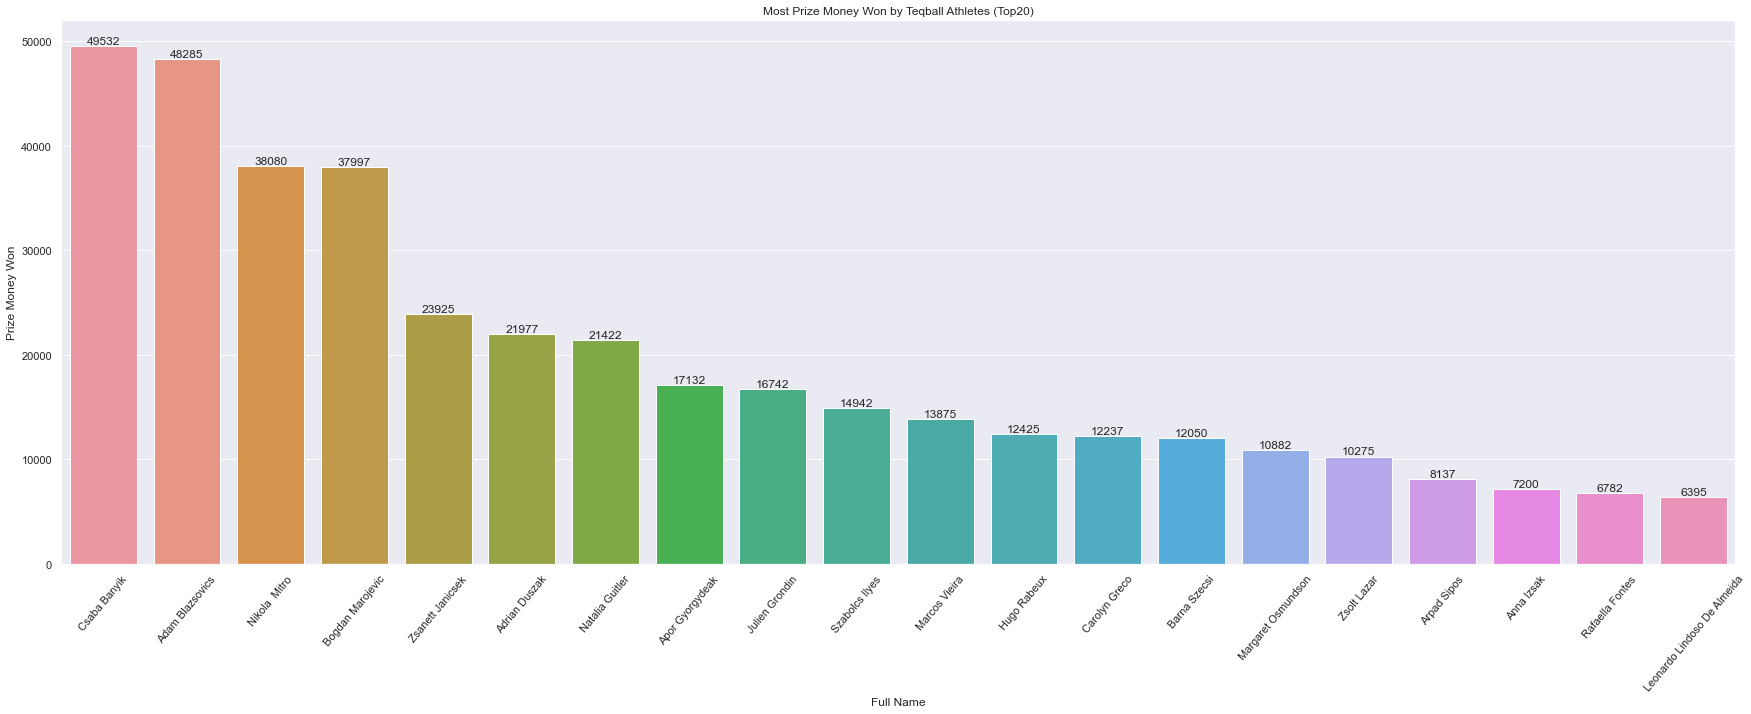

In [647]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(30,10)})
ax = sns.barplot(x="Name", y="PrizeMoney", data=dfsum[:20])
ax.set(xlabel='Full Name', ylabel='Prize Money Won', title = 'Most Prize Money Won by Teqball Athletes (Top20)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.bar_label(ax.containers[0])


In [611]:
## Prize Money Per Competition (Scatter plot)

5

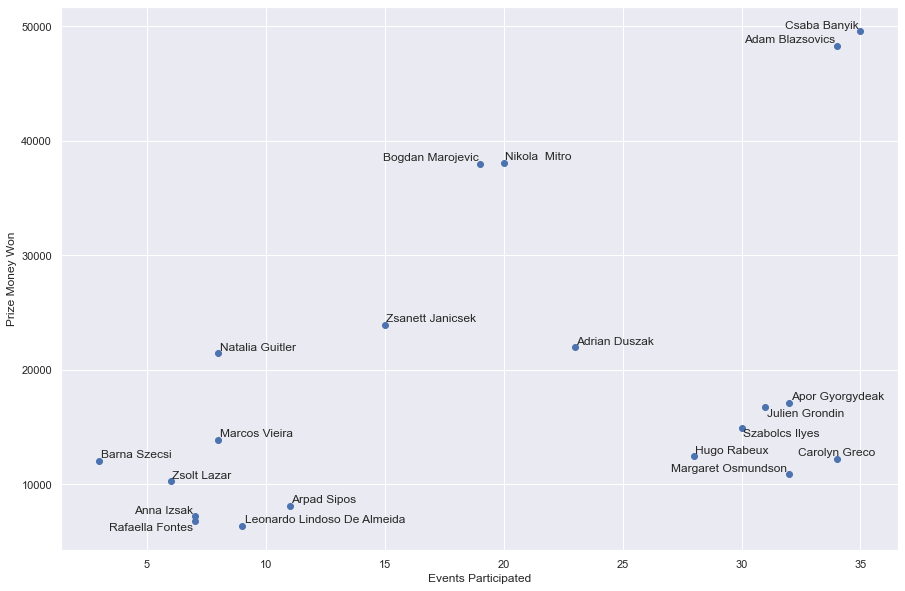

In [612]:
x = dfsum['Events Participated']
y = dfsum['PrizeMoney']
fig, ax = plt.subplots()
fig.set_size_inches(15, 10, forward=True)
plt.plot(x, y, 'bo')
plt.xlabel("Events Participated")
plt.ylabel("Prize Money Won")
texts = [plt.text(x[i], y[i], dfsum.Name[i]) for i in range(dfsum.shape[0])]
adjust_text(texts)

6

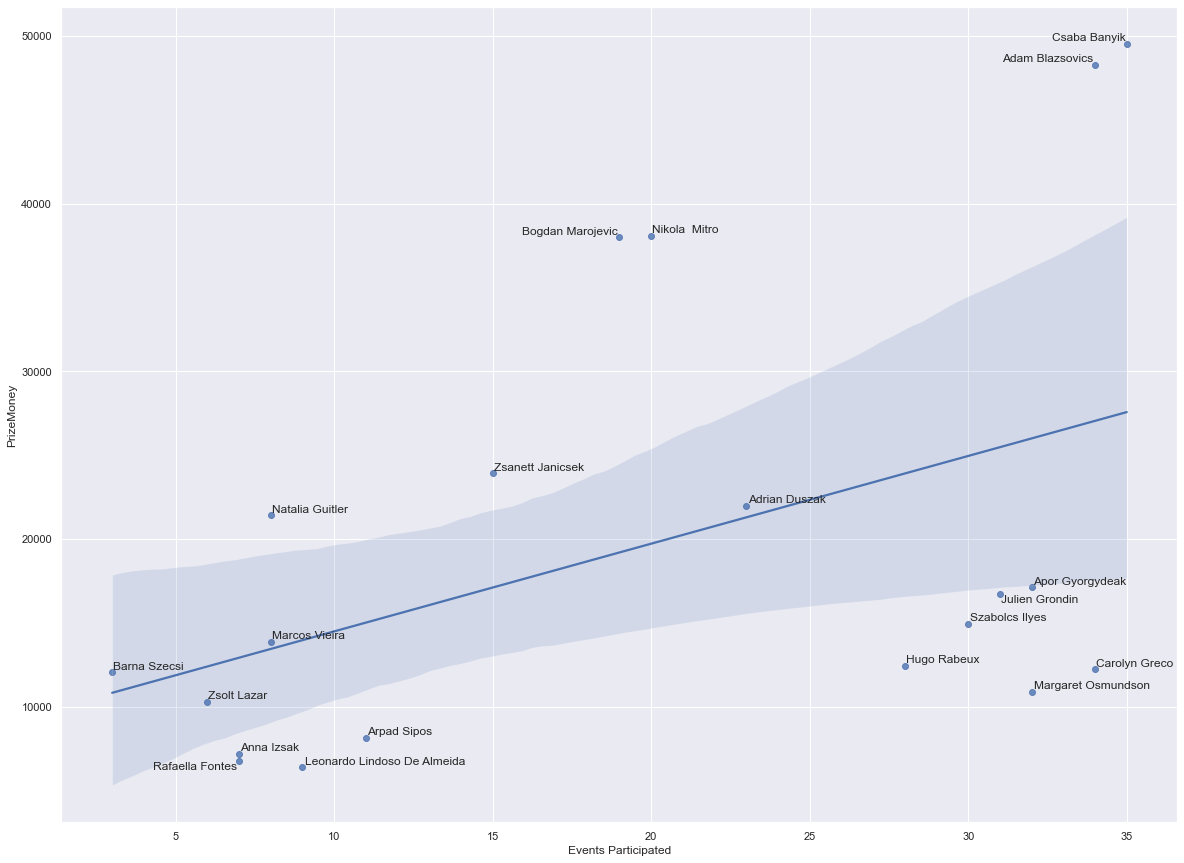

In [620]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.regplot(x=dfsum['Events Participated'].astype('int'), y= dfsum['PrizeMoney'].astype('int'), data=dfsum)
texts = [plt.text(x[i], y[i], dfsum.Name[i]) for i in range(dfsum.shape[0])]
adjust_text(texts)

In [627]:
## Plotting money balance (withdrawing event participation expenses from prize money won)

In [645]:
dfbalance =  dfsum.sort_values(by= 'PrizeMoney', ascending = False).reset_index(drop = True)

[Text(0, 0, 'Csaba Banyik'),
 Text(1, 0, 'Adam Blazsovics'),
 Text(2, 0, 'Nikola  Mitro'),
 Text(3, 0, 'Bogdan Marojevic'),
 Text(4, 0, 'Zsanett Janicsek'),
 Text(5, 0, 'Adrian Duszak'),
 Text(6, 0, 'Natalia Guitler'),
 Text(7, 0, 'Apor Gyorgydeak'),
 Text(8, 0, 'Julien Grondin'),
 Text(9, 0, 'Szabolcs Ilyes'),
 Text(10, 0, 'Marcos Vieira'),
 Text(11, 0, 'Hugo Rabeux'),
 Text(12, 0, 'Carolyn Greco'),
 Text(13, 0, 'Barna Szecsi'),
 Text(14, 0, 'Margaret Osmundson'),
 Text(15, 0, 'Zsolt Lazar'),
 Text(16, 0, 'Arpad Sipos'),
 Text(17, 0, 'Anna Izsak'),
 Text(18, 0, 'Rafaella Fontes'),
 Text(19, 0, 'Leonardo Lindoso De Almeida')]

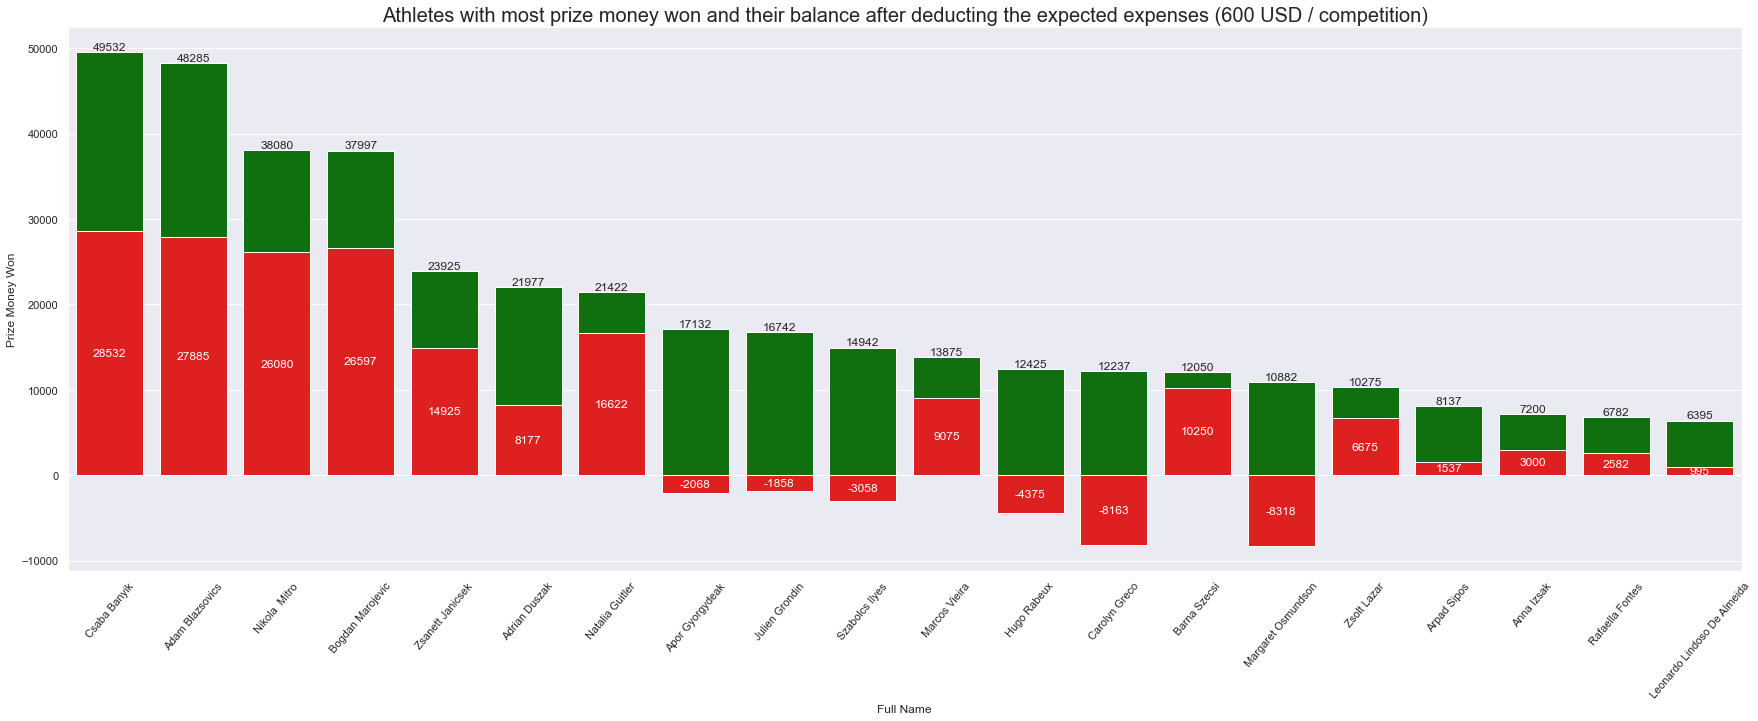

In [676]:

ax = sns.barplot(x="Name", y="PrizeMoney", data=dfsum[:20], color='green')
ax.bar_label(ax.containers[0])


sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(30,10)})
ax = sns.barplot(x="Name", y="Balance", data= dfbalance[:20], color = 'red')
ax.bar_label(ax.containers[1], label_type= 'center', color = 'white')
ax.set(xlabel='Full Name', ylabel='Prize Money Won')
ax.set_title('Athletes with most prize money won and their balance after deducting the expected expenses (600 USD / competition)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)




In [ ]:
## Prize Money Won Per Event